In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [348]:
np.version.version

'1.24.3'

In [349]:
!python --version

Python 3.11.4


In [350]:
pip list

Package                       Version
----------------------------- ---------------
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcal

In [351]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 8.12.2
ipykernel        : 6.25.0
ipywidgets       : 8.0.4
jupyter_client   : 7.4.9
jupyter_core     : 5.3.0
jupyter_server   : 1.23.4
jupyterlab       : 3.6.3
nbclient         : 0.5.13
nbconvert        : 6.5.4
nbformat         : 5.7.0
notebook         : 6.5.4
qtconsole        : 5.4.2
traitlets        : 5.7.1


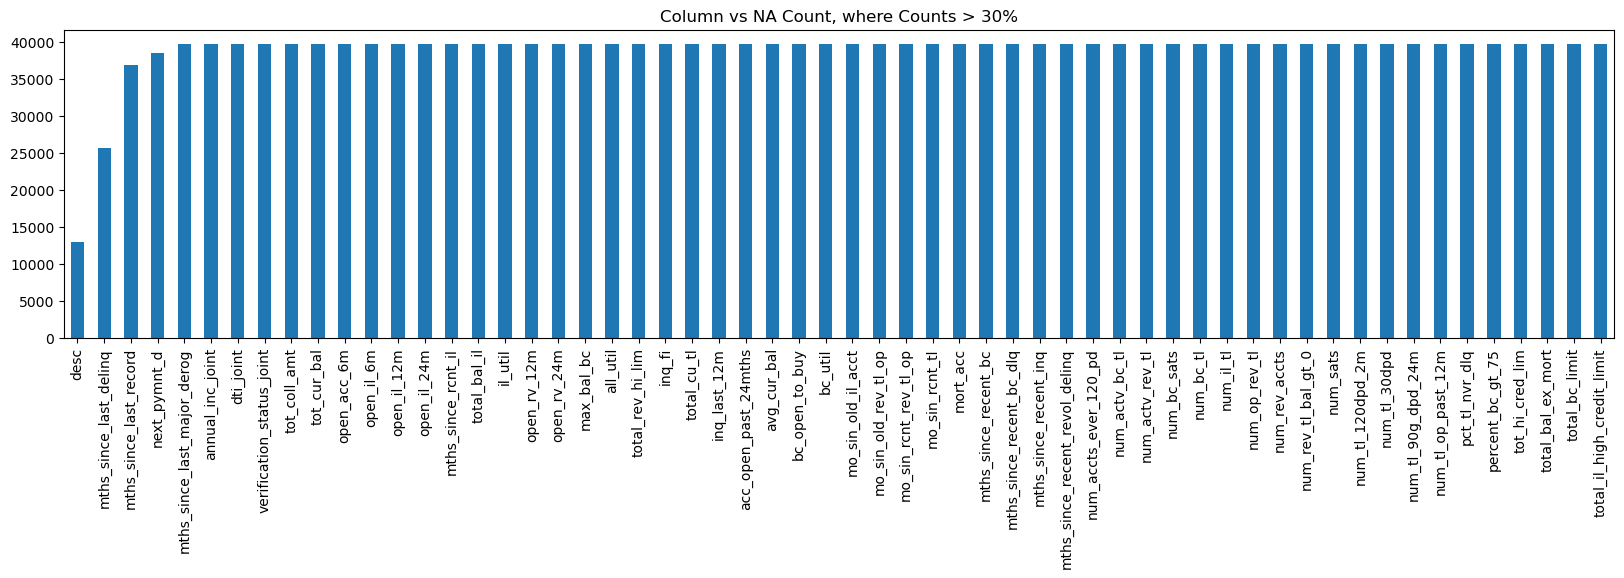

In [3]:
col_na = df.isnull().sum()
col_na = col_na[col_na.values > (0.3*len(df))]
plt.figure(figsize=(20,4))
col_na.plot(kind='bar')
plt.title('Column vs NA Count, where Counts > 30%')
plt.show()

In [4]:
col_na.index

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
     

In [5]:
col_na.shape

(58,)

In [6]:
df.drop(labels=col_na.index, axis=1, inplace=True) 
df.shape

(39717, 53)

In [7]:
# see if rows having more than 30% null values
rows = df.transpose().isnull().sum()
rows = list(rows[rows.values > (0.3*len(df))].index)
rows

[]

In [9]:
# dont need to drop any rows, as there arent any

In [10]:
# see if there are any columns with unique values
unique = df.nunique()
unique = unique[unique.values == 1]
unique

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

In [11]:
# dropping columns having only unique values
# as they arent useful for analysis
df.drop(labels=unique.index, axis=1, inplace=True)
df.shape

(39717, 44)

In [12]:
# Looking through Data Dictionary
# identified few columns which can be dropped for this analysis
# by marking them in Data_Dictionary.xlsx
df_dict = pd.read_excel('Data_Dictionary.xlsx')
df_dict[df_dict['Required Final'] == 1.0]

,LoanStatNew,Description,Required Primary,Required Secondary,Required Final
2,addr_state,The state provided by the borrower in the loan...,1.0,NaN,1.0
4,annual_inc,The self-reported annual income provided by th...,1.0,NaN,1.0
13,delinq_2yrs,The number of 30+ days past-due incidences of ...,NaN,1.0,1.0
16,dti,A ratio calculated using the borrower’s total ...,1.0,NaN,1.0
19,emp_length,Employment length in years. Possible values ar...,1.0,NaN,1.0
25,grade,LC assigned loan grade,1.0,NaN,1.0
26,home_ownership,The home ownership status provided by the borr...,1.0,NaN,1.0
33,installment,The monthly payment owed by the borrower if th...,1.0,NaN,1.0
34,int_rate,Interest Rate on the loan,1.0,NaN,1.0
35,issue_d,The month which the loan was funded,1.0,NaN,1.0


In [13]:
# dropping columns from DataFrame which are not in Reqired List from Data_Dictionary
df_dict_required = df_dict[df_dict['Required Final'] == 1.0]['LoanStatNew']
skip_columns = df.columns.difference(df_dict_required)

df.drop(labels=skip_columns, axis =1, inplace=True)
df.shape

(39717, 20)

In [14]:
# dervie numeric columns from existing columns for analysis
df['int_rate'] = df['int_rate'].apply(lambda x: x.rstrip('%'))
df['revol_util'] = df['revol_util'].apply(lambda x: str(x).rstrip('%'))
df['issue_d_year'] = df['issue_d'].apply(lambda x: '20'+x.split('-')[1])
df['issue_d_month'] = df['issue_d'].apply(lambda x: x.split('-')[0])

In [15]:
# drop column(s) after deriving into new columns
skip_columns = ['issue_d']
df.drop(labels=skip_columns, axis =1, inplace=True)
df.shape

(39717, 21)

In [20]:
# replacing nan with 0 in revol_util column
df.revol_util.replace('nan', 0, inplace=True)
# replacing na in emp_length with mode value
df.emp_length.fillna(df.emp_length.mode()[0], inplace=True)

In [17]:
# Cast all continuos variables to numeric to perform analysis 
numeric_columns = ['loan_amnt','int_rate','installment','annual_inc','dti','delinq_2yrs','open_acc', 'pub_rec', 'revol_util', 'total_acc', 'issue_d_year']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

In [19]:
# check to see if the columns have the required type as desired
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   term                 39717 non-null  object 
 2   int_rate             39717 non-null  float64
 3   installment          39717 non-null  float64
 4   grade                39717 non-null  object 
 5   sub_grade            39717 non-null  object 
 6   emp_length           38642 non-null  object 
 7   home_ownership       39717 non-null  object 
 8   annual_inc           39717 non-null  float64
 9   verification_status  39717 non-null  object 
 10  loan_status          39717 non-null  object 
 11  purpose              39717 non-null  object 
 12  addr_state           39717 non-null  object 
 13  dti                  39717 non-null  float64
 14  delinq_2yrs          39717 non-null  int64  
 15  open_acc             39717 non-null 

In [21]:
# check to see if any columns still have na or null values
df.isna().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
addr_state             0
dti                    0
delinq_2yrs            0
open_acc               0
pub_rec                0
revol_util             0
total_acc              0
issue_d_year           0
issue_d_month          0
dtype: int64

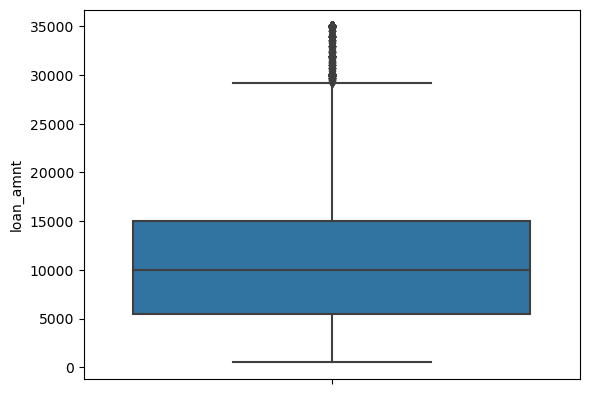

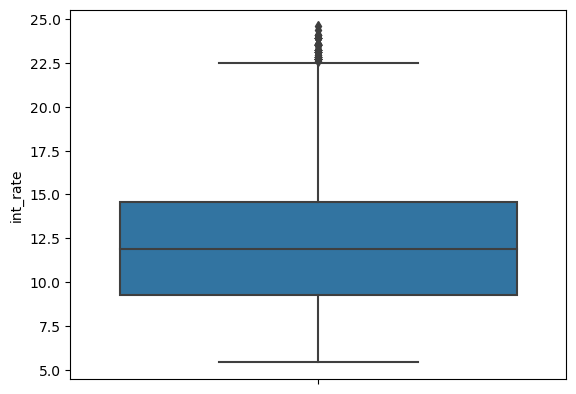

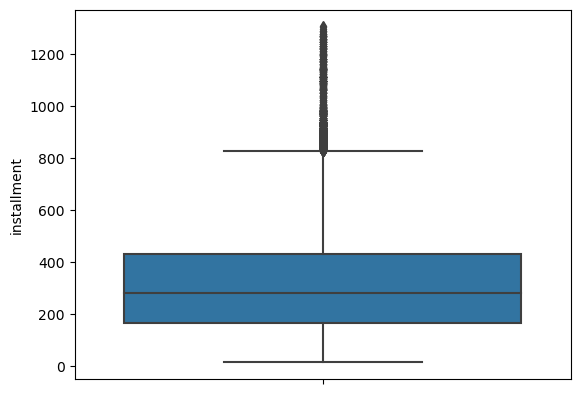

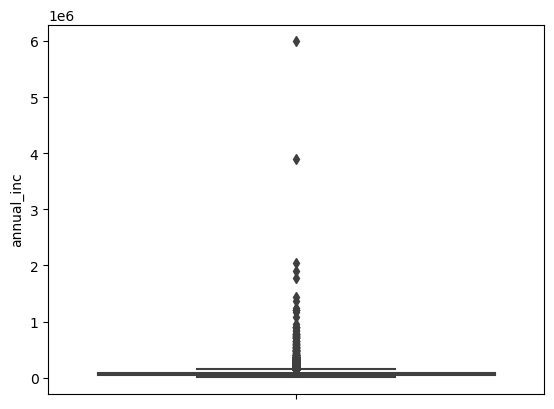

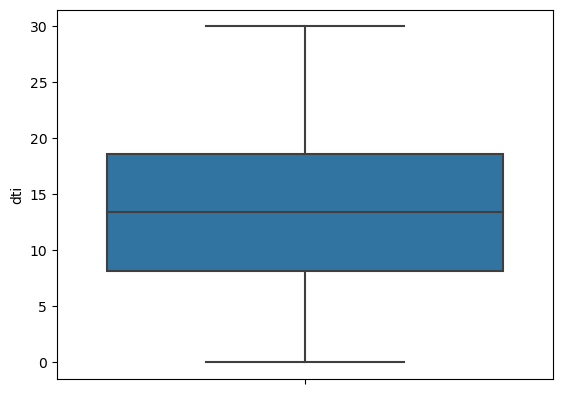

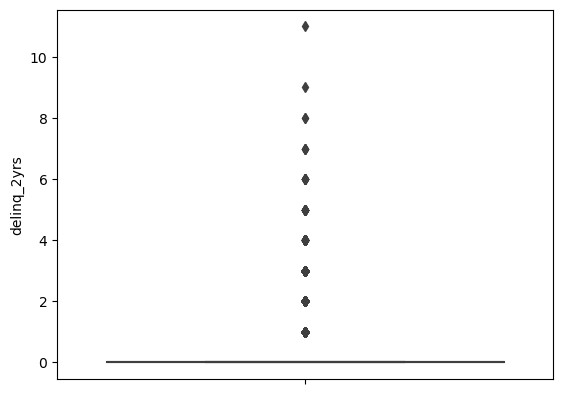

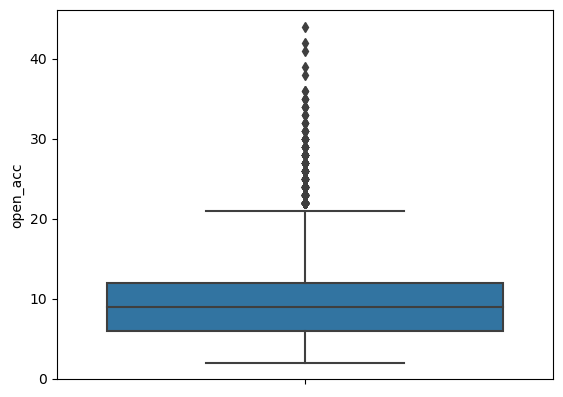

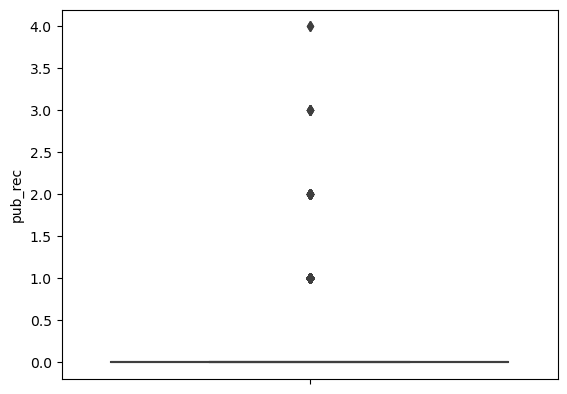

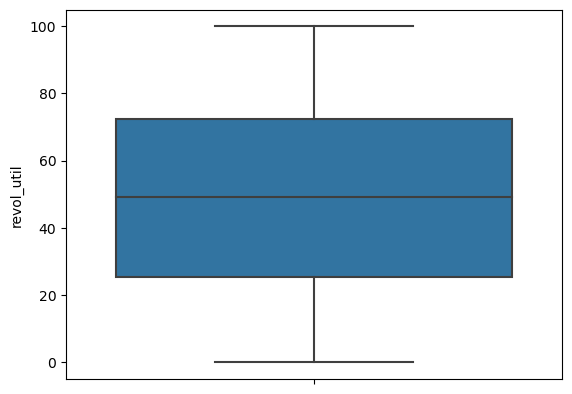

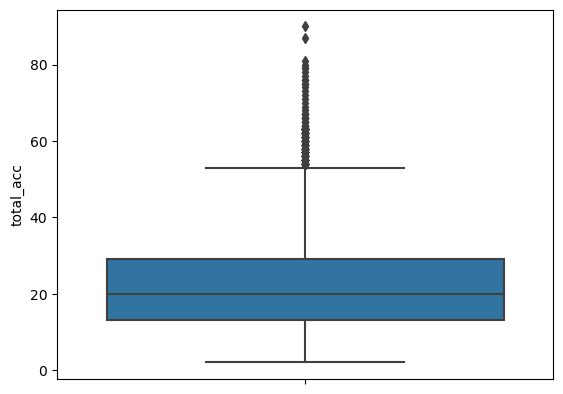

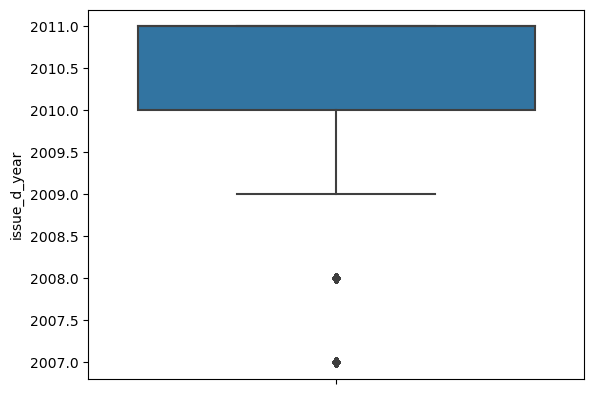

In [22]:
# draw box plot for each 'int' / 'float' column to check the outliers
for col in df.select_dtypes(['int','float']).columns:
    sns.boxplot(y=df[col])
    #plt.figure(figsize=[5,5])
    plt.show()

In [26]:
# annual_inc has outliers
# so, removing outlier records
annual_inc_25 = df.annual_inc.quantile(0.25)
annual_inc_75 = df.annual_inc.quantile(0.75)
annual_inc_iqr = annual_inc_75 - annual_inc_25
annual_inc_upper_limit = annual_inc_75 + 1.5*annual_inc_iqr
print("df shape before: ", df.shape)
print("25 quantile:", annual_inc_25)
print("75 quantile:", annual_inc_75)
print("IQR (75-25):", annual_inc_iqr)
print("Upper limit (75 + 1.5*IQR):", annual_inc_upper_limit)
df = df[df['annual_inc'] < annual_inc_upper_limit]
print("df shape after: ", df.shape)

df shape before:  (39717, 21)
25 quantile: 40404.0
75 quantile: 82300.0
IQR (75-25): 41896.0
Upper limit (75 + 1.5*IQR): 145144.0
df shape after:  (37874, 21)


In [27]:
# saving the filtered data into a file
# for excel / outside viewing
df.to_csv('loan_filtered.csv')

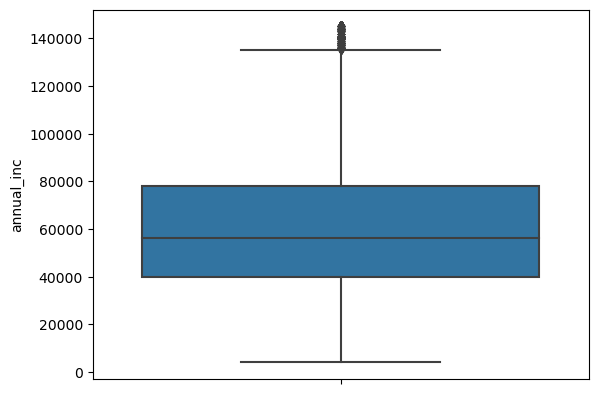

In [28]:
# check annual_inc to see the outliers again after dropping
sns.boxplot(y=df.annual_inc)
plt.show()

In [29]:
# lets collect continous and categorical columns for easy handling
continous_cols = df.select_dtypes(['int', 'float']).columns
categorical_cols = df.columns.difference(continous_cols)

print(continous_cols)
print(categorical_cols)

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'issue_d_year'],
      dtype='object')
Index(['addr_state', 'emp_length', 'grade', 'home_ownership', 'issue_d_month',
       'loan_status', 'purpose', 'sub_grade', 'term', 'verification_status'],
      dtype='object')


## <font color='blue'>Univariate Analysis</font>

In [30]:
# helper functions for graphing univariate continous & categorical column
def univariate_cont(df, col):
    sns.set(style='darkgrid')
    fig, ax = plt.subplots(figsize=(15,7))
    sns.distplot(df[col], kde=True, ax=ax)
    plt.show()

def univariate_cat(df, col, rotation=0):
    sns.set(style='darkgrid')
    fig, ax = plt.subplots(figsize=(5,5))
    y_val = df.groupby(col)[col].count().apply(lambda x: np.ceil(x * 100 / len(df))).sort_values(ascending=False)
    ax = sns.barplot(x=df[col].value_counts().index, y=y_val, ax=ax)
    ax.bar_label(ax.containers[0])
    plt.xticks(rotation=rotation)
    plt.ylabel('Percentage')
    plt.show()

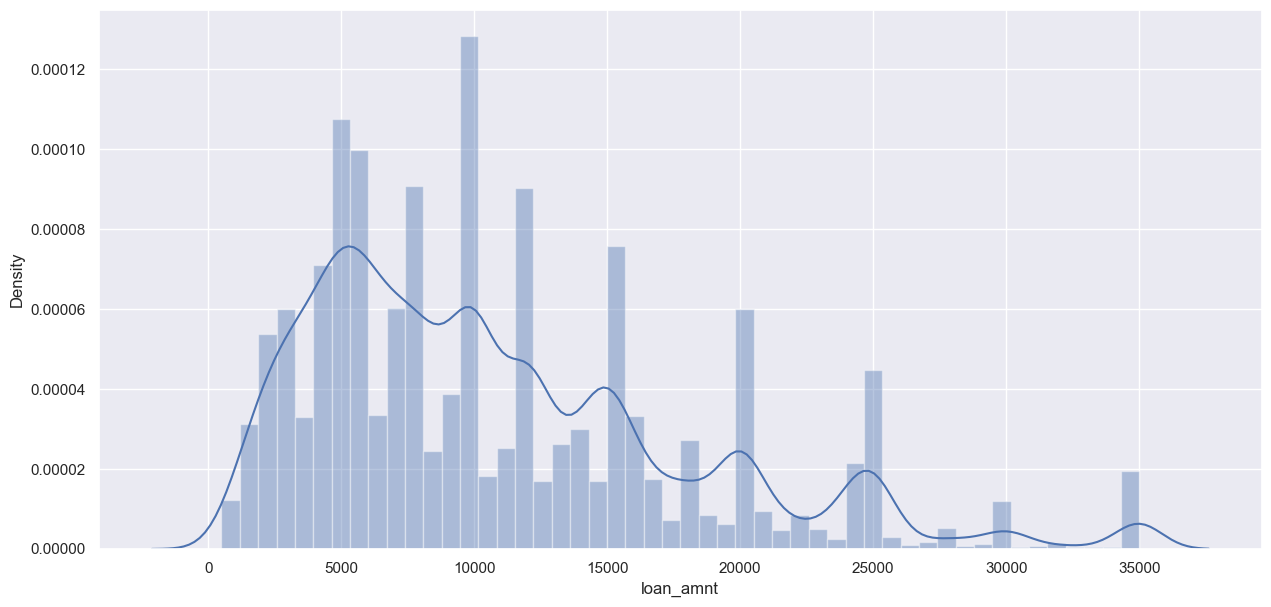

In [32]:
# visualize Loan Amount column
univariate_cont(df, 'loan_amnt')

##### <font color='blue'>Insight: Most of the loans range from 4000 - 20000</font>

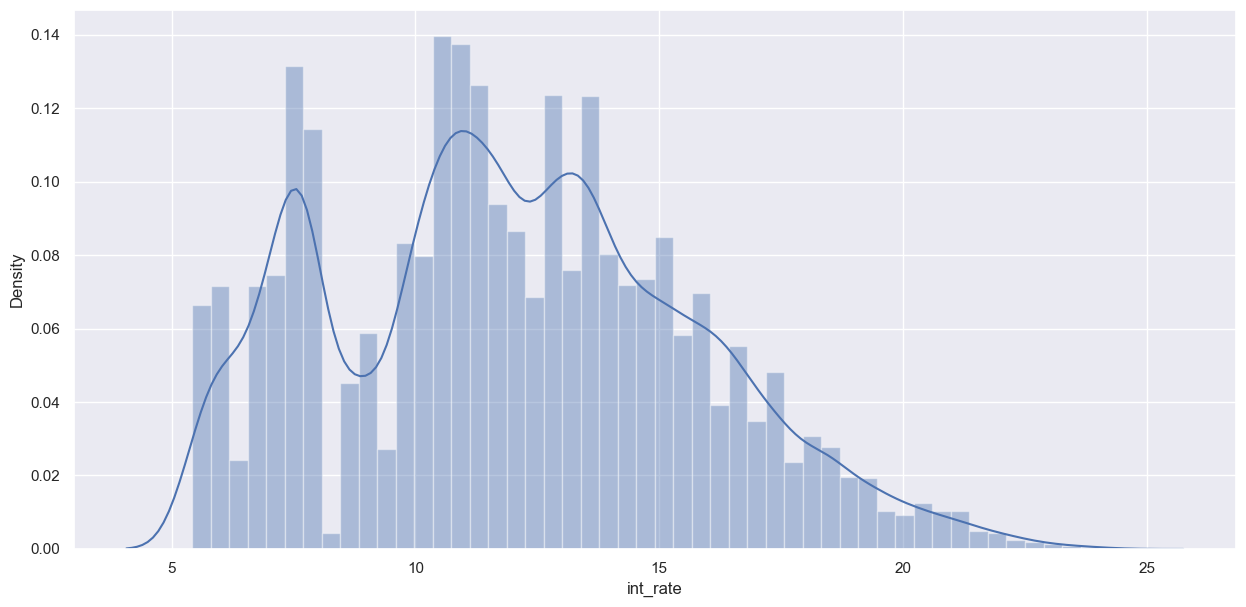

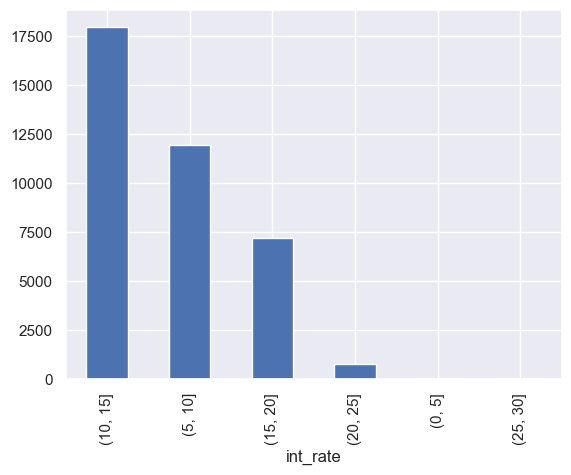

In [34]:
# visualize Interest Rate column
univariate_cont(df, 'int_rate')
# and visualize thru binning also
bins = [0, 5, 10, 15, 20, 25, 30]
pd.cut(df['int_rate'], bins).value_counts().plot(kind='bar')
plt.show()

##### <font color='blue'>Insight: Most of the interest rates are distributed between 5% to 15%</font>

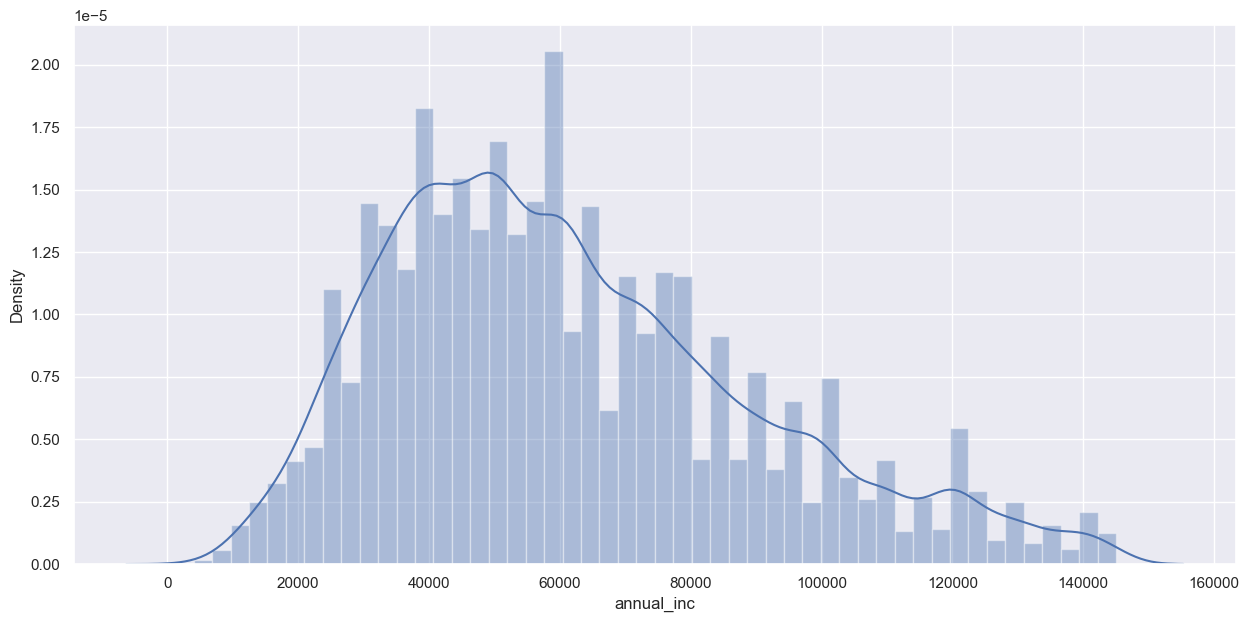

In [35]:
# visualize Annual Income column
univariate_cont(df, 'annual_inc')

##### <font color='blue'>Insight: Most of the applications income lies between 30000 to 80000</font>

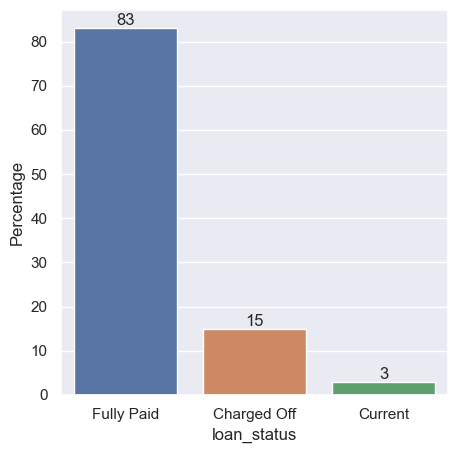

In [36]:
# visualize Interest Loan Status
univariate_cat(df, 'loan_status')

##### <font color='blue'>Insight: Fully Paid: 83%, Charged Off: 15%, Current: 3%</font>

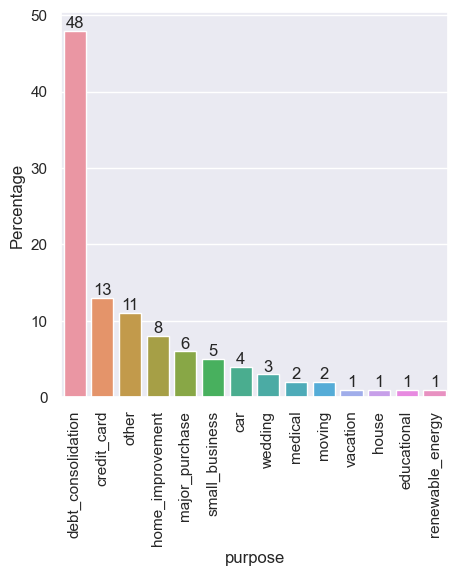

In [37]:
# visualize Purpose column
univariate_cat(df, 'purpose', rotation=90)

##### <font color='blue'>Insight: 61% applied for paying other loans, i.e., debit consolidation (48%) / credit card (13%)</font>

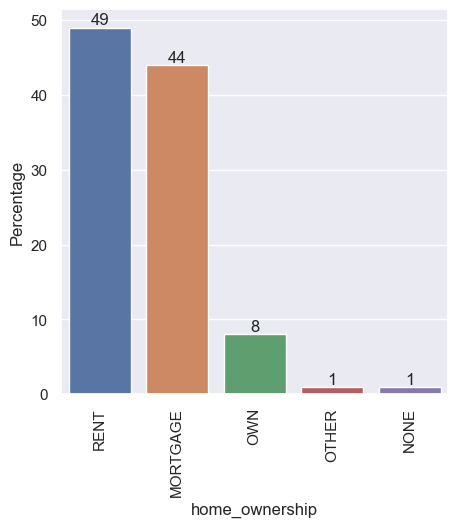

In [38]:
# visualize Home Ownership column
univariate_cat(df, 'home_ownership', rotation=90)

##### <font color='blue'>Insight: Most of the owners are either on Rent (49%) or Mortgage (44%)</font>

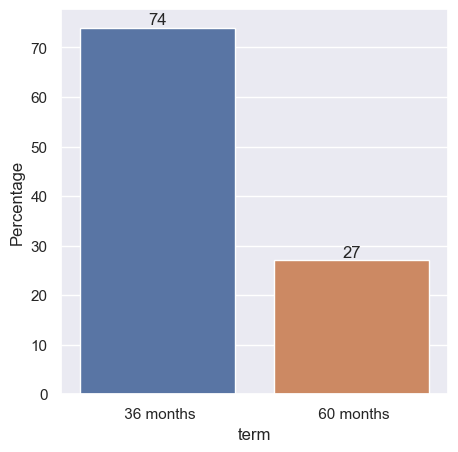

In [39]:
# visualize Loan Term column
univariate_cat(df, 'term')

##### <font color='blue'>Insight: Most of the loans are issued for 36 months (74%)</font>

## <font color='blue'>Bivariate Analysis</font>

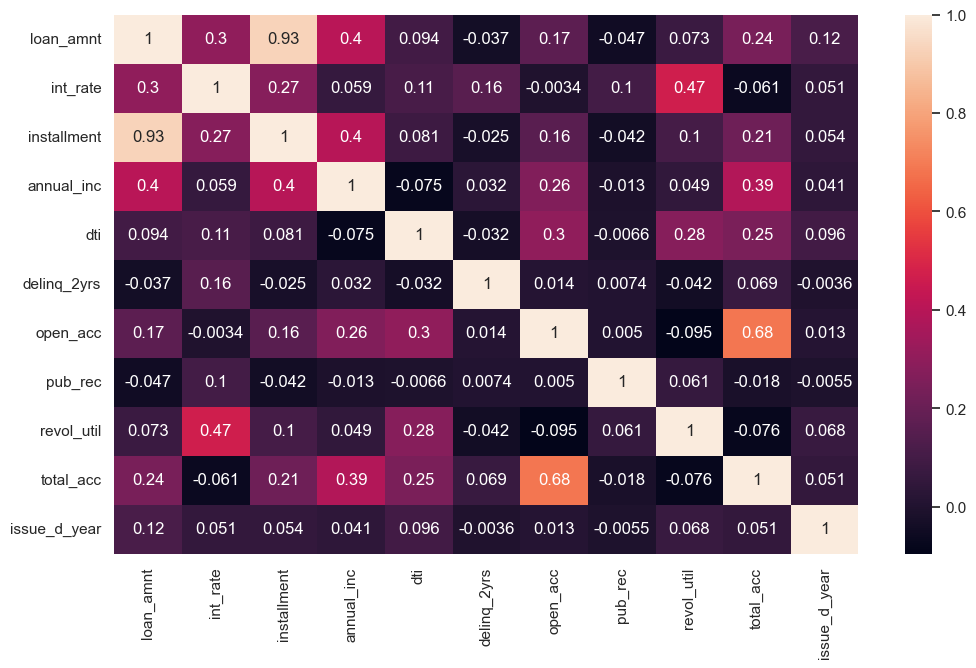

In [40]:
# continous columns corelation
plt.figure(figsize=(12,7))
sns.heatmap(df[continous_cols].corr(), annot=True)
plt.show()

##### <font color='blue'>Insight: from correlation heatmap</font>
1. Interest rate has positive correlation with loan amount
2. Loan amount is highly correlated with installment
3. Annual income has negative correlation with DTI
4. DTI has small positive correlation with loan amount and installment
5. Annual income has positive correlation with installment, loan amount
6. Annual income has negative correlation with DTI

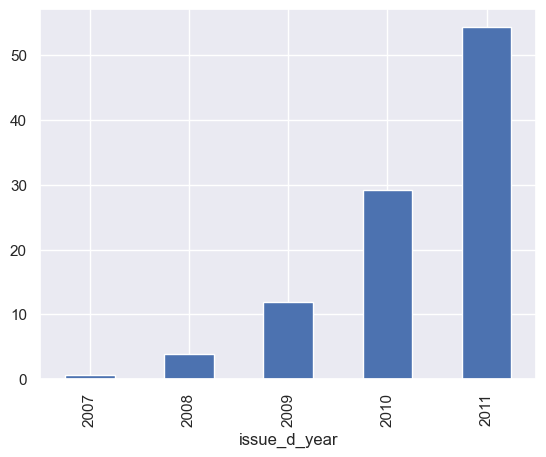

In [41]:
# year vs loan_status count
df.groupby('issue_d_year')['loan_status'].count().apply(lambda x: x*100 / len(df)).plot(kind='bar')
plt.show()

##### <font color='blue'>Insight: Loan applicants increases year after year, reaching over 55% in 2011</font>

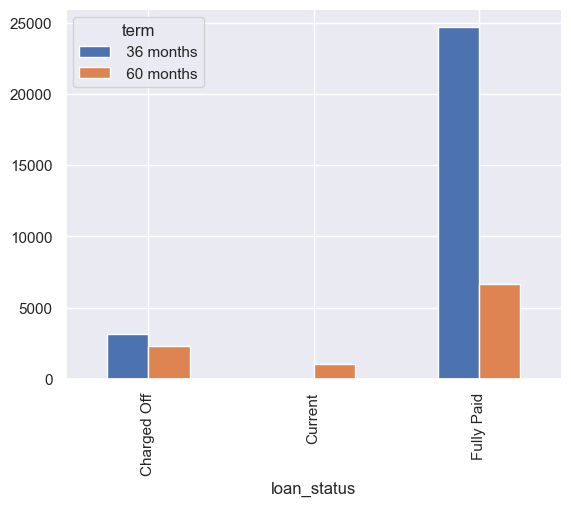

In [42]:
# loan_status vs term_months count
df.groupby('loan_status')['term'].value_counts().unstack().plot(kind='bar')
plt.show()

##### <font color='blue'>Insight: Charged Off is slightly more for 36 months vs 60 months tenure</font>

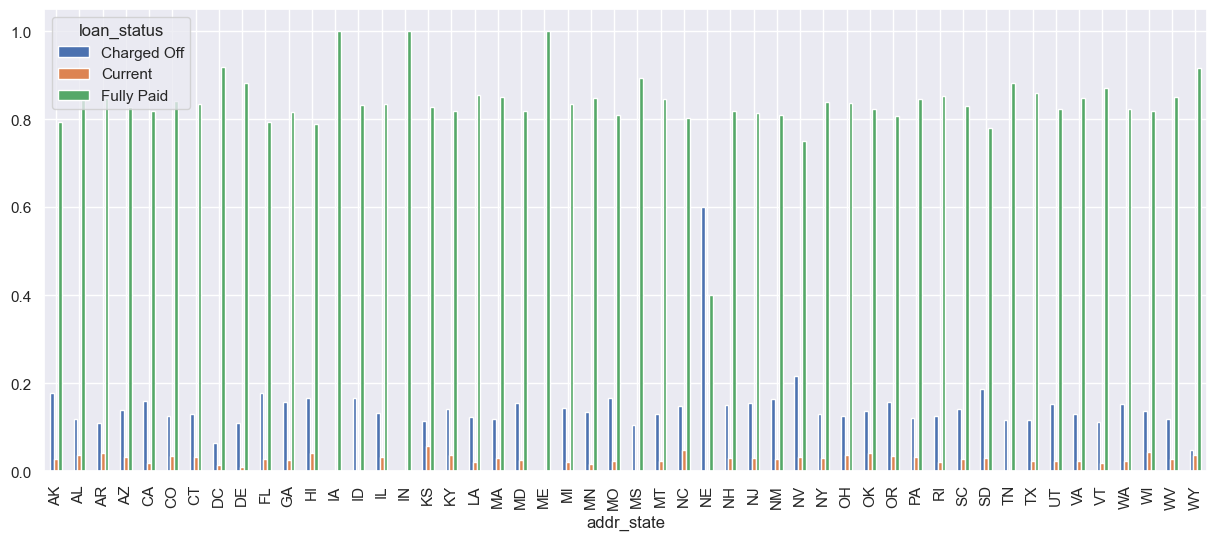

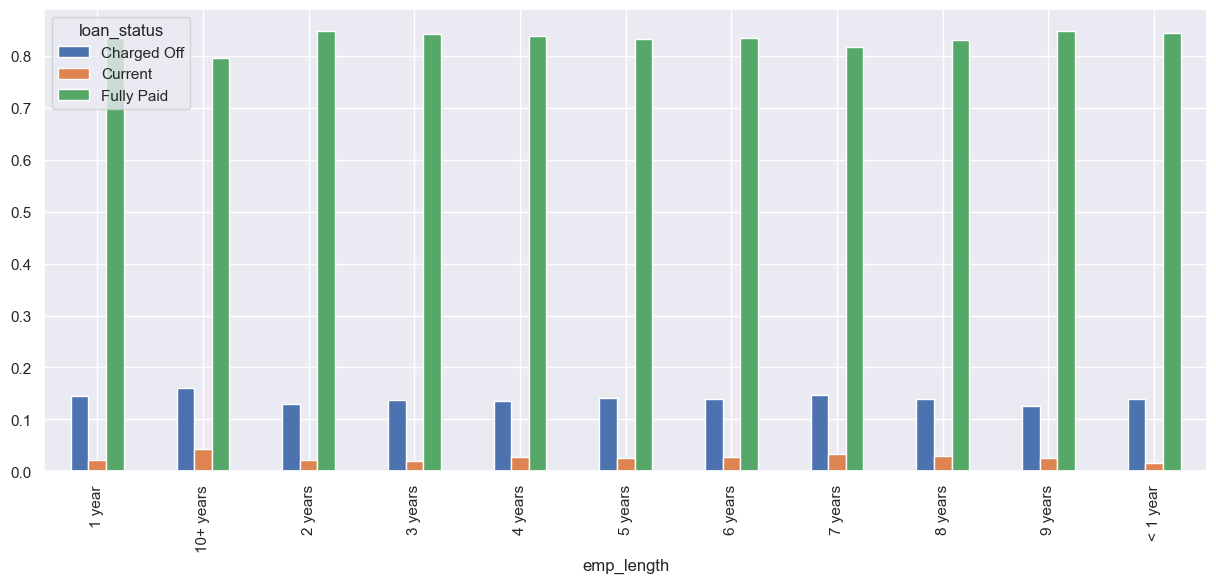

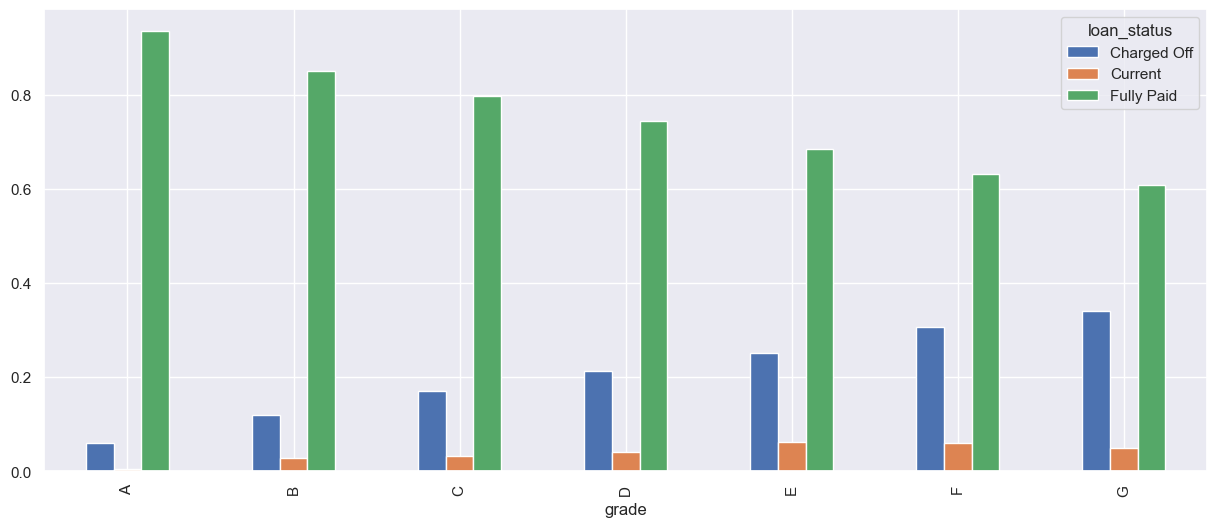

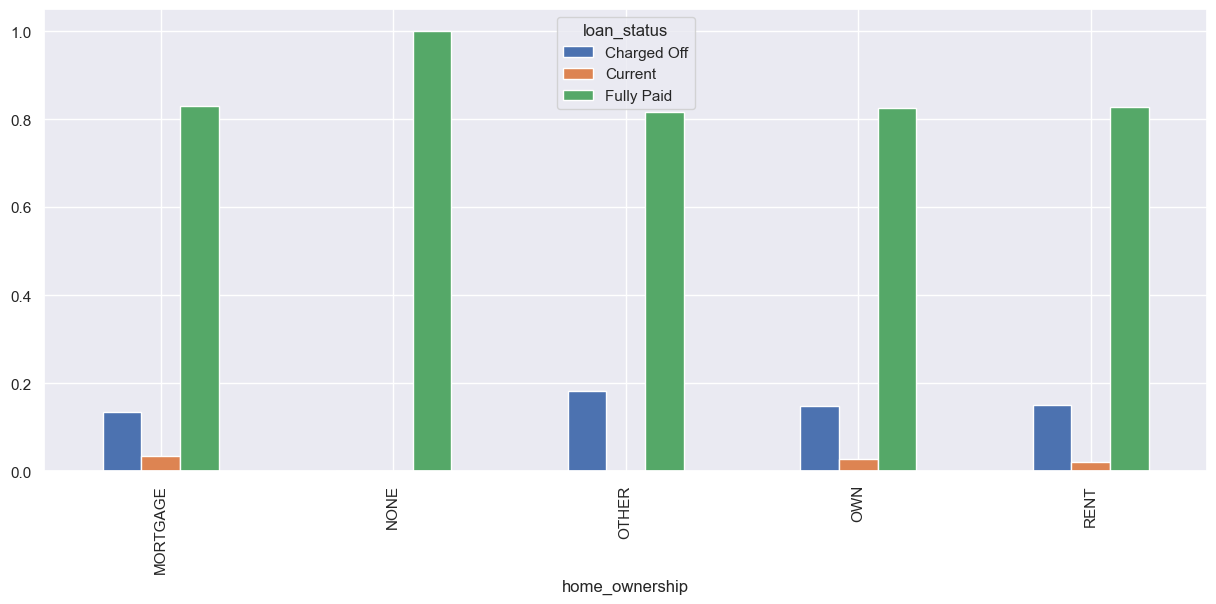

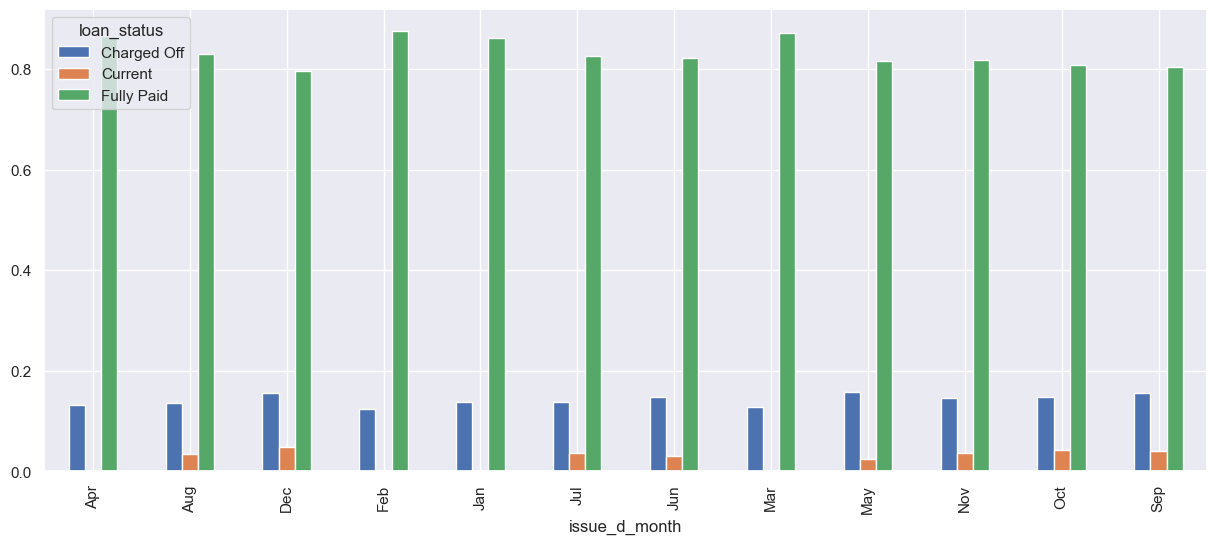

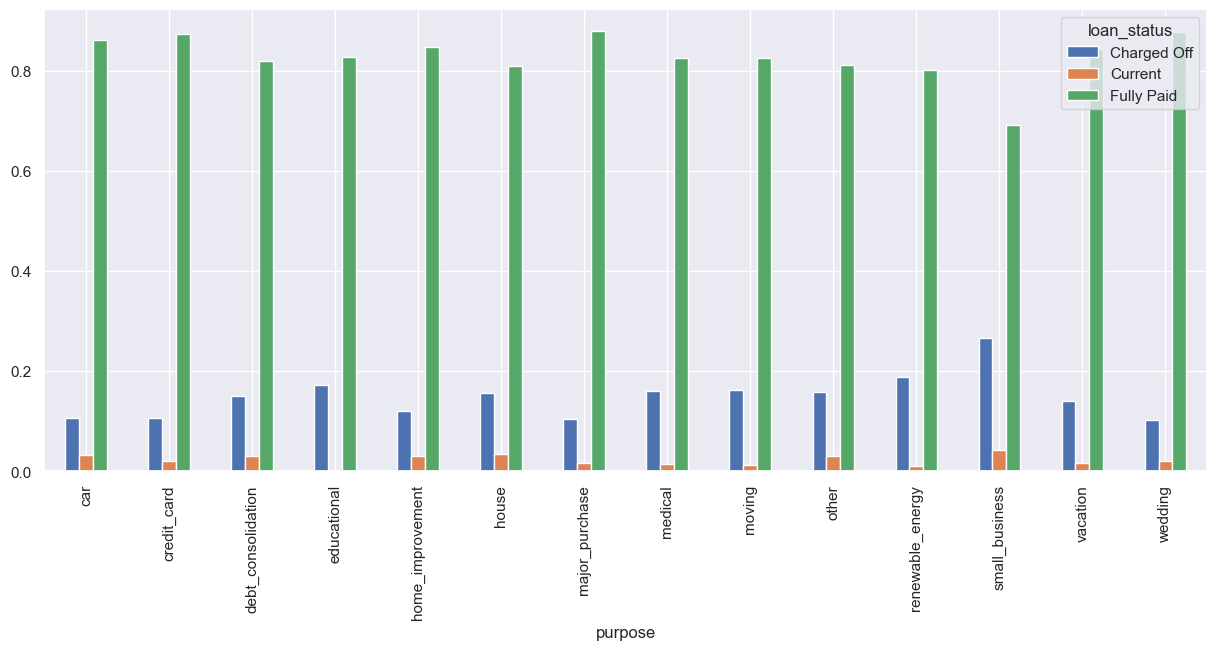

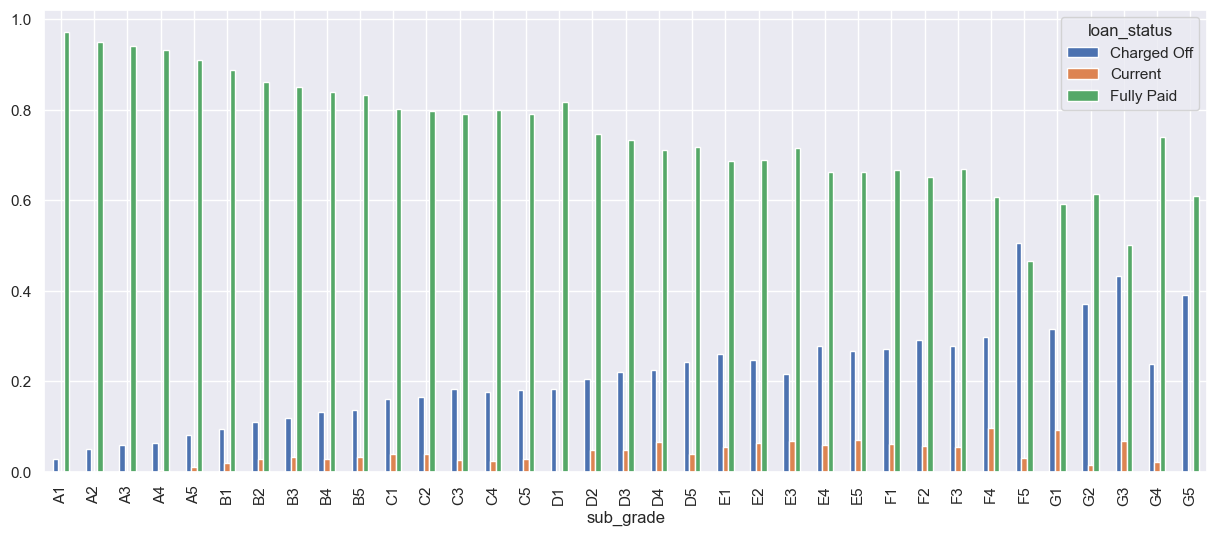

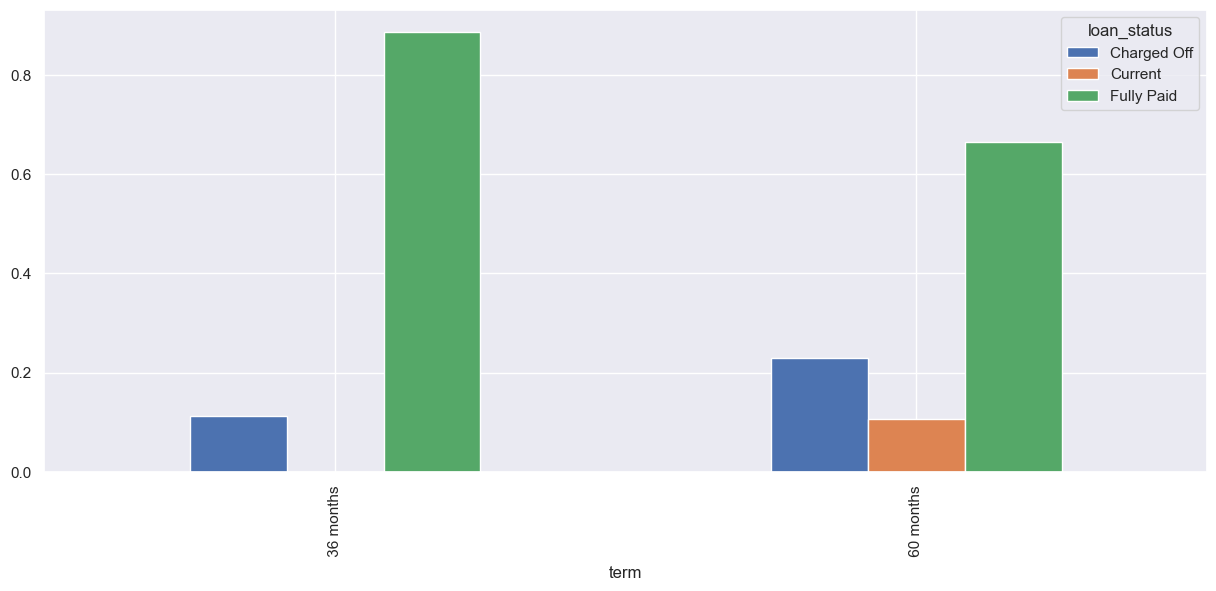

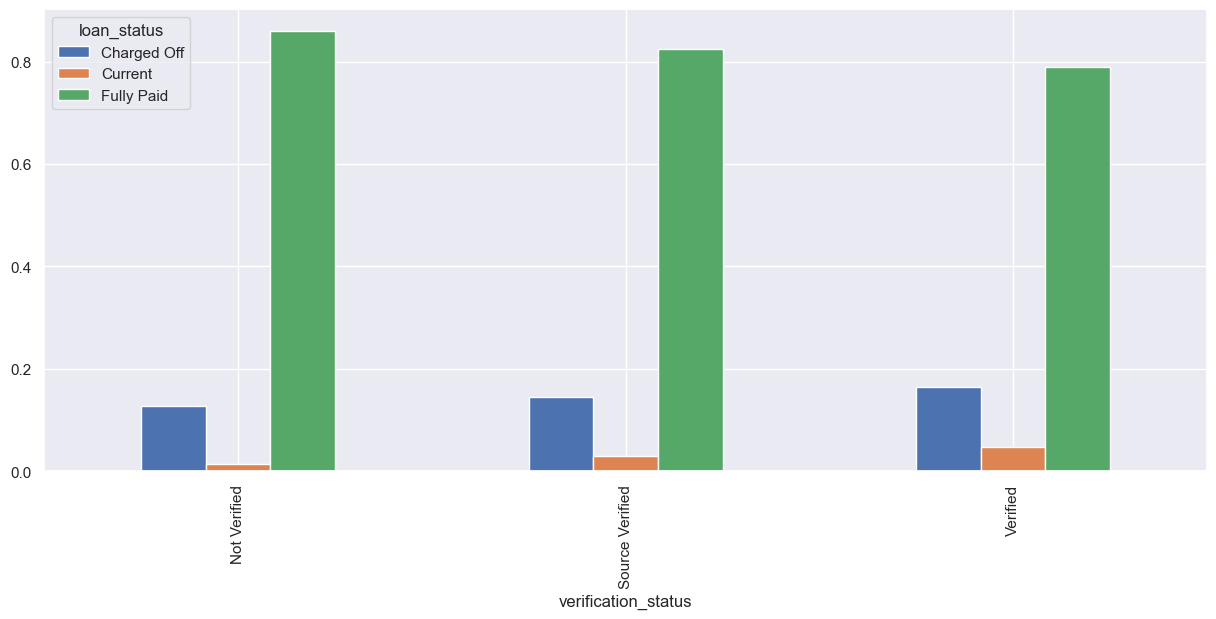

In [43]:
# chart bar plot grouping on loan status for analyzing Charged Off on all Categorical Columns
for col in categorical_cols:
    if (col == "loan_status"): 
        continue
    df.groupby(col)['loan_status'].value_counts(normalize=True).sort_values().unstack().plot(kind='bar', stacked=False, figsize=(15,6))
    plt.show()

##### <font color='blue'>Insight: for 'Charged Off' </font>
<b>1. loan_status vs addr_state:</b> State NE (Nebraska) stands out as the highest
<br/><b>2. loan_status vs emp_length:</b> Employment length doesnot seem to have an influence
<br/><b>3. loan_status vs grade:</b> 'Charged Off' increases as grades go from A to G
<br/><b>4. loan_status vs home_ownership:</b> Except for none, all other categories have similar rate
<br/><b>5. loan_status vs issue_month:</b> Occasionally a bit higher for some months, but not significantly different
<br/><b>6. loan_status vs purpose:</b> Significant increase for small_business
<br/><b>7. loan_status vs sub_grade:</b> Incremental trend moving from A to G, but significant for F5
<br/><b>8. loan_status vs term:</b> Higher for 60 months compared with 30 months
<br/><b>9. loan_status vs verified:</b>  Ironically verified has higher than Not Verified

## <font color='blue'>Multivariate Analysis</font>